In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import networkx as nx
import os
import re
from w3lib.html import replace_entities

import torch
import numpy as np
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

d:\Experiments\BookRecommendationSystem\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../data/raw/Book-Crossing User review ratings.csv")

In [3]:
df.head(4)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN


In [4]:
unnecessary_col = ["Unnamed: 0", "location"]

In [5]:
df["Category"] = df["Category"].apply(lambda x : re.sub(r"[\"\[w+\]\']", "", x))
df["Summary"] = df["Summary"].apply(lambda x : replace_entities(x))
df["Summary"] = df["Summary"].apply(lambda x : re.sub(r"[^a-zA-Z0-9\\\s]", "", x))

In [6]:
df = df.drop(unnecessary_col, axis=1)

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.drop(df[df['Language'] == "9"].index, inplace = True)
df.drop(df[df['Category'] == "9"].index, inplace = True)
df.drop(df[df['Summary'] == "9"].index, inplace = True)

In [9]:
df.head(4)

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,2,18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,Social Science,stockton,california,usa
1,8,34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,In a small town in Canada Clara Callan relucta...,en,Actresses,timmins,ontario,canada
2,11400,49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,In a small town in Canada Clara Callan relucta...,en,Actresses,ottawa,ontario,canada
3,11676,34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,In a small town in Canada Clara Callan relucta...,en,Actresses,NaN,NaN,NaN


<Axes: xlabel='rating'>

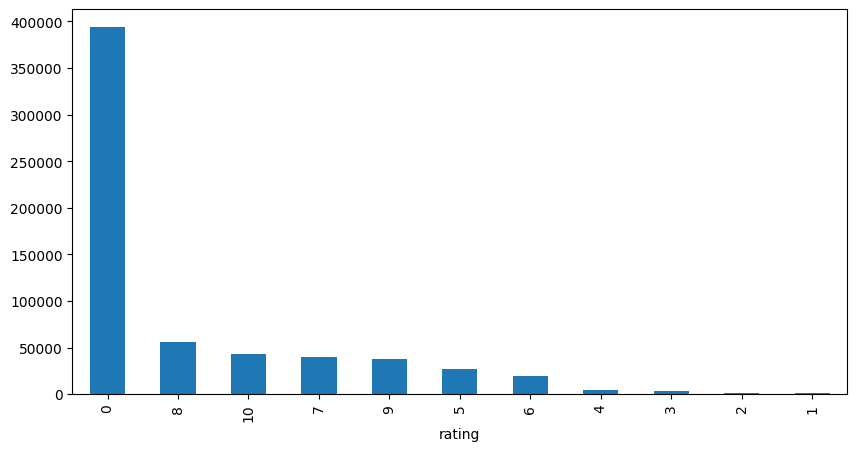

In [10]:
plt.figure(figsize=(10, 5))
df["rating"].value_counts().plot.bar()

In [11]:
print(f"The most frequently user id: {df['user_id'].mode()[0]}")
print(f"The most frequently book: {df['book_title'].mode()[0]}")

The most frequently user id: 11676
The most frequently book: Wild Animus


In [12]:
missing_col = ["book_author", "city", "state", "country"]

for col in df.columns:
  if df[col].dtype != float:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df.isna().sum()

user_id                0
age                    0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
img_s                  0
img_m                  0
img_l                  0
Summary                0
Language               0
Category               0
city                   0
state                  0
country                0
dtype: int64

In [14]:
df = df.replace(
    "Alice (Fictitious character",
    "Alice (Fictitious character : Carroll)",
)

In [15]:
number_of_samples = len(df)
print(f"Number of samples: {number_of_samples:,}")

Number of samples: 625,073


In [16]:
number_of_users = len(df["user_id"].unique())
print(f"Number of users: {number_of_users:,}")

Number of users: 67,699


In [17]:
number_of_books = len(df["isbn"].unique())
print(f"Number of books: {number_of_books:,}")

Number of books: 138,701


In [18]:
df = df.sort_values("user_id")

In [26]:
user_interactions = {}
for user_id, group in df.groupby("user_id"):
    user_interactions[user_id] = len(group)

In [31]:
user_interactions_count = sorted(
    user_interactions.items(),
    key=lambda x: x[1],
    reverse=True,
)

In [19]:
reduced_df = pd.DataFrame(columns=df.columns)
grouped = df.groupby('user_id')
max_books_per_user = 4
for user_id, group in grouped:
    selected_books = group.sample(n=min(max_books_per_user, len(group)), random_state=42)
    reduced_df = pd.concat([reduced_df, selected_books])

In [ ]:
df = reduced_df

In [ ]:
encode_cols = [
    "book_title",
    "book_author",
    "publisher",
    "Language",
    "Category",
    "isbn",
    "city",
    "state",
    "country",
]

for col in encode_cols:
    df.loc[:, col] = LabelEncoder().fit_transform(df[col])

## Split data to 2 parts (User, Book)

In [ ]:
user_features_col = [
    "user_id",
    "age",
    "rating",
    "city",
    "state",
    "country",
]
users_df = df[user_features_col].reset_index()

In [ ]:
users_df["user_id"] = LabelEncoder().fit_transform(users_df["user_id"])

In [ ]:
books_features_col = [
    "isbn",
    "book_title",
    "book_author",
    "year_of_publication",
    "publisher",
    "Summary",
    "Language",
    "Category",
]

books_df = df[books_features_col].reset_index()

In [ ]:
books_df["isbn"] = LabelEncoder().fit_transform(books_df["isbn"])

In [ ]:
rating = df[["user_id", "isbn", "rating"]]

In [ ]:
number_of_nodes = len(users_df["user_id"].unique()) + len(books_df["isbn"].unique())
print(f"{number_of_nodes = :,}")

number_of_nodes = 117,981


In [ ]:
books_images = {}

for record in books_df.to_numpy():
    isbn = record[0]
    image_link = df.iloc[:, 8]
    if isbn not in books_images.keys():
        books_images[isbn] = image_link

In [ ]:
books_df.head(1)

,index,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category
0,0,5473,7179,16262,2002.0,2986,Provides an introduction to classical myths pl...,6,2928


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
edge_index = rating[["user_id", "isbn"]].values.transpose()
labels = rating["rating"].values

In [ ]:
G = nx.Graph()
for u, v in zip(*edge_index):
    G.add_edge(u, v)

In [ ]:
users_frequency = df["user_id"].value_counts().to_list()
books_frequency = df["isbn"].value_counts().to_list()
node_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(number_of_nodes)]

In [ ]:
degrees = dict(G.degree)
node_size = [v * 10 for v in degrees.values()]

In [ ]:
if not os.path.exists("../docs/Images/book_review_1.png"):
    plt.figure(figsize=(30, 20))
    nx.draw(G=G, node_color=node_colors, node_size=node_size)
    plt.savefig("../docs/book_review_1.png", dpi=300, bbox_inches='tight')

In [ ]:
summary_sentences = books_df["Summary"].to_list()

In [ ]:
MAX_LENGTH = 34
PRE_TRAINED_PATH = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_PATH)

In [ ]:
encoding = tokenizer(
    summary_sentences,
    add_special_tokens=False,
    max_length=MAX_LENGTH,
    padding=True,
    return_attention_mask=False,
    return_tensors="pt",
)

d:\Experiments\BookRecommendationSystem\venv\lib\site-packages\transformers\tokenization_utils_base.py:2436: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [ ]:
embedding_matrix = encoding["input_ids"]

In [ ]:
instance_view = embedding_matrix.transpose(0, 1)

In [ ]:
embeddings = {f"Summary_{i}": [] for i in range(1, MAX_LENGTH + 1)}
for i, key in enumerate(embeddings.keys()):
    embeddings[key] = instance_view[i].tolist()

In [ ]:
summary_df = pd.DataFrame(embeddings)

In [ ]:
len(books_df)

136926

In [ ]:
len(summary_df)

136926

In [ ]:
books_df = pd.concat([books_df, summary_df], axis=1)

In [ ]:
books_df.drop(["Summary"], inplace=True, axis=1)

In [ ]:
books_df

,index,isbn,book_title,book_author,year_of_publication,publisher,Language,Category,Summary_1,Summary_2,...,Summary_25,Summary_26,Summary_27,Summary_28,Summary_29,Summary_30,Summary_31,Summary_32,Summary_33,Summary_34
0,0,5473,7179,16262,2002.0,2986,6,2928,3640,2019,...,2129,2122,6991,2031,2042,6791,1999,3906,2396,0
1,29,14208,38625,6361,1999.0,4374,6,1415,1037,2298,...,18300,2037,3226,1998,28699,18969,2055,2129,23368,2015
2,30,15329,37452,851,1991.0,3352,6,1768,1037,2822,...,2015,5023,23019,2947,15870,1037,2186,1997,5021,24216
3,63,16416,45244,20741,2000.0,501,6,2046,8927,2011,...,2357,2041,11543,2107,2004,2065,1996,4633,2006,20315
4,95,46893,14490,12988,1994.0,3500,6,1768,1037,17950,...,1998,1996,8945,3363,16776,14762,2357,8069,2000,6497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136921,440863,19720,8821,4989,1992.0,398,6,2108,2028,1997,...,5621,8363,2000,13215,3267,2015,2126,1997,7694,1996
136922,807433,23922,17302,20629,1988.0,409,6,1768,2005,2086,...,1996,25180,2015,2007,11620,11530,13240,11749,3459,1997
136923,776182,16242,18790,13242,1998.0,501,6,1768,1999,2014,...,5952,3005,27398,2015,2421,2019,4654,25485,3258,2923
136924,237537,16207,16172,18826,1998.0,501,6,1768,1996,24842,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
users_df.head()

,index,user_id,age,rating,city,state,country
0,0,0,18.0000,0,10074,249,311
1,29,1,34.7439,0,10480,1074,47
2,30,1,34.7439,0,10480,1074,47
3,63,1,34.7439,0,10480,1074,47
4,95,1,34.7439,7,10480,1074,47


In [ ]:
preprocessed_data = pd.concat([users_df, books_df], axis=1)

In [ ]:
preprocessed_data.drop(["index"], axis=1, inplace=True)

In [ ]:
preprocessed_data

,user_id,age,rating,city,state,country,isbn,book_title,book_author,year_of_publication,...,Summary_25,Summary_26,Summary_27,Summary_28,Summary_29,Summary_30,Summary_31,Summary_32,Summary_33,Summary_34
0,0,18.0000,0,10074,249,311,5473,7179,16262,2002.0,...,2129,2122,6991,2031,2042,6791,1999,3906,2396,0
1,1,34.7439,0,10480,1074,47,14208,38625,6361,1999.0,...,18300,2037,3226,1998,28699,18969,2055,2129,23368,2015
2,1,34.7439,0,10480,1074,47,15329,37452,851,1991.0,...,2015,5023,23019,2947,15870,1037,2186,1997,5021,24216
3,1,34.7439,0,10480,1074,47,16416,45244,20741,2000.0,...,2357,2041,11543,2107,2004,2065,1996,4633,2006,20315
4,1,34.7439,7,10480,1074,47,46893,14490,12988,1994.0,...,1998,1996,8945,3363,16776,14762,2357,8069,2000,6497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136921,67697,32.0000,8,1307,1175,21,19720,8821,4989,1992.0,...,5621,8363,2000,13215,3267,2015,2126,1997,7694,1996
136922,67698,34.7439,6,8311,1080,311,23922,17302,20629,1988.0,...,1996,25180,2015,2007,11620,11530,13240,11749,3459,1997
136923,67698,34.7439,7,8311,1080,311,16242,18790,13242,1998.0,...,5952,3005,27398,2015,2421,2019,4654,25485,3258,2923
136924,67698,34.7439,7,8311,1080,311,16207,16172,18826,1998.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# preprocessed_data.to_csv("../data/processed/BookReviewProcessedData_M.csv", index=False)